In [2]:
# Download dataset
from torchvision.datasets import MNIST

In [3]:
np_train_dataset = MNIST('./mnist_train_np/', train=True, download=True)

In [28]:
# Start MLP implementation in numpy

In [29]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder

In [30]:
np.random.seed(3)

In [31]:
def fetch(fp):
    with open(fp, "rb") as f:
        data = f.read()
    return np.frombuffer(data, dtype=np.uint8).copy()

In [32]:
X_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-labels-idx1-ubyte")[8:]
X_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-labels-idx1-ubyte")[8:]

In [33]:
def normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test):
    
    # Encode output label as a one hot vector
    oneHotEncoder = OneHotEncoder(sparse=False, categories='auto')
    Y_train = oneHotEncoder.fit_transform(Y_train.reshape(len(Y_train), -1))
    Y_test = oneHotEncoder.transform(Y_test.reshape(len(Y_test), -1))
    
    # Normalize data by diving by 255. All values are in range 0-255
    X_train = X_train / 255.
    X_test = X_test / 255.

    return X_train, Y_train, X_test, Y_test

In [34]:
X_train, Y_train, X_test, Y_test = normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test)

In [35]:
# initialize params
n = 60000
batch_size=128

In [36]:
# initialize weights
def initialize_weights():
    W1 = np.zeros((300, 784))
    W2 = np.zeros((10, 300))
    return W1, W2

In [37]:
costs = []
accuracies = []

In [38]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [39]:
def softmax(x):
    power = np.exp(x - np.max(x))
    return power / power.sum(axis=0, keepdims=True)

In [40]:
def de_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [41]:
def forward(X, W1, W2):
    Z1 = W1.dot(X.T)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1)
    A2 = softmax(Z2)
    return A1, W1, Z1, A2, W2, Z2

In [42]:
def backward(X, Y, A1, W1, Z1, A2, W2, Z2):
    dZ2 = A2 - Y.T
    dW2 = dZ2.dot(A1.T) / n
    dZ1 = W2.T.dot(dZ2) * de_sigmoid(Z1)
    dW1 = dZ1.dot(X) / n
    return dW1, dW2

In [43]:
def predict(W1, W2, X, Y):
    A1, W1, Z1, A2, W2, Z2 = forward(X, W1, W2)
    y_hat = np.argmax(A2, axis=0)
    Y = np.argmax(Y, axis = 1)
    accuracy = (y_hat == Y).mean()
    return accuracy * 100

In [44]:
def train_model(X, Y, alpha=0.7, n_iterations=200000):
    W1, W2 = initialize_weights()
    for iteration in range(n_iterations):
        batch = np.random.choice(n, batch_size, replace=False)
        x = X[batch]
        y = Y[batch]
        A1, W1, Z1, A2, W2, Z2 = forward(x, W1, W2)
        cost = -np.mean(y*np.log(A2.T))
        dW1, dW2 = backward(x, y, A1, W1, Z1, A2, W2, Z2)
        W1 = W1 - alpha * dW1
        W2 = W2 - alpha * dW2
        acc = predict(W1, W2, x, y)
        if iteration % 100 == 0:
            print("Cost: ", cost, "Train Accuracy:", acc)
        if iteration % 10 == 0:
            costs.append(cost)
            accuracies.append(acc)
    return W1, W2

In [46]:
W1, W2 = train_model(X_train, Y_train)
print("W1: ", W1)
print("W2: ", W2)

Cost:  0.23025850929940456 Train Accuracy: 13.28125
Cost:  0.23010741036751195 Train Accuracy: 14.84375
Cost:  0.23021287587398326 Train Accuracy: 8.59375
Cost:  0.2301069964029292 Train Accuracy: 10.15625
Cost:  0.23103731746795528 Train Accuracy: 7.03125
Cost:  0.230426286939604 Train Accuracy: 7.8125
Cost:  0.23034322159115664 Train Accuracy: 13.28125
Cost:  0.22997364789220312 Train Accuracy: 9.375
Cost:  0.23037724606774918 Train Accuracy: 7.03125
Cost:  0.23065549018502116 Train Accuracy: 9.375
Cost:  0.22967587044031107 Train Accuracy: 12.5
Cost:  0.230316261637686 Train Accuracy: 7.8125
Cost:  0.23038861695607632 Train Accuracy: 10.9375
Cost:  0.23051817009052106 Train Accuracy: 7.8125
Cost:  0.23050750224006542 Train Accuracy: 7.8125
Cost:  0.23049714921273265 Train Accuracy: 10.15625
Cost:  0.22958357986390449 Train Accuracy: 14.0625
Cost:  0.22991711699299958 Train Accuracy: 12.5
Cost:  0.23031972899214065 Train Accuracy: 12.5
Cost:  0.23095806622362983 Train Accuracy: 7.031

Cost:  0.23037375723652675 Train Accuracy: 10.9375
Cost:  0.23024808420030585 Train Accuracy: 9.375
Cost:  0.23096299093591943 Train Accuracy: 3.90625
Cost:  0.22965709432671585 Train Accuracy: 14.84375
Cost:  0.23024961460426435 Train Accuracy: 8.59375
Cost:  0.22994437277178487 Train Accuracy: 13.28125
Cost:  0.23049713004556613 Train Accuracy: 10.9375
Cost:  0.22941787883878256 Train Accuracy: 14.0625
Cost:  0.23019536399083682 Train Accuracy: 11.71875
Cost:  0.2304897885819262 Train Accuracy: 10.15625
Cost:  0.2305931091723908 Train Accuracy: 7.8125
Cost:  0.23003184810667127 Train Accuracy: 10.9375
Cost:  0.23060722417524376 Train Accuracy: 7.8125
Cost:  0.2306014527074783 Train Accuracy: 10.9375
Cost:  0.23021889480249405 Train Accuracy: 10.9375
Cost:  0.23059836483173327 Train Accuracy: 11.71875
Cost:  0.2304956997192253 Train Accuracy: 9.375
Cost:  0.22962851235554207 Train Accuracy: 13.28125
Cost:  0.22971405605715342 Train Accuracy: 14.0625
Cost:  0.2298807619176963 Train Acc

Cost:  0.230187841287638 Train Accuracy: 11.71875
Cost:  0.23024496566639613 Train Accuracy: 9.375
Cost:  0.23016097160825666 Train Accuracy: 11.71875
Cost:  0.2302899417768737 Train Accuracy: 8.59375
Cost:  0.23027969848094426 Train Accuracy: 12.5
Cost:  0.23019840359083216 Train Accuracy: 9.375
Cost:  0.2298969669955575 Train Accuracy: 14.0625
Cost:  0.22999444230566607 Train Accuracy: 13.28125
Cost:  0.22978752156019225 Train Accuracy: 14.0625
Cost:  0.230313760108181 Train Accuracy: 7.8125
Cost:  0.22959850470606374 Train Accuracy: 14.0625
Cost:  0.22981795266362587 Train Accuracy: 12.5
Cost:  0.229919820585578 Train Accuracy: 11.71875
Cost:  0.23046593439119656 Train Accuracy: 9.375
Cost:  0.23027581597465646 Train Accuracy: 9.375
Cost:  0.23055186150055168 Train Accuracy: 7.8125
Cost:  0.23010369130973665 Train Accuracy: 10.9375
Cost:  0.22996204994579478 Train Accuracy: 13.28125
Cost:  0.22969873551665893 Train Accuracy: 10.15625
Cost:  0.22948052684981485 Train Accuracy: 15.625

Cost:  0.22947692799627428 Train Accuracy: 14.0625
Cost:  0.22975901213890917 Train Accuracy: 10.15625
Cost:  0.2292208826225946 Train Accuracy: 16.40625
Cost:  0.2303530145994192 Train Accuracy: 10.15625
Cost:  0.23027775246247129 Train Accuracy: 12.5
Cost:  0.23054547805081566 Train Accuracy: 8.59375
Cost:  0.23073408548634547 Train Accuracy: 13.28125
Cost:  0.22944370638709044 Train Accuracy: 14.0625
Cost:  0.22939873221468893 Train Accuracy: 18.75
Cost:  0.23011496579056095 Train Accuracy: 11.71875
Cost:  0.23032268349152113 Train Accuracy: 7.03125
Cost:  0.23001054111014457 Train Accuracy: 14.0625
Cost:  0.22971743502281639 Train Accuracy: 11.71875
Cost:  0.23065922903447317 Train Accuracy: 7.8125
Cost:  0.23045080918049415 Train Accuracy: 10.9375
Cost:  0.23007764639401457 Train Accuracy: 12.5
Cost:  0.23025950803821846 Train Accuracy: 11.71875
Cost:  0.2301865101882477 Train Accuracy: 7.8125
Cost:  0.23055456598970245 Train Accuracy: 10.15625
Cost:  0.22945199747276163 Train Acc

Cost:  0.23073502069922114 Train Accuracy: 8.59375
Cost:  0.23011524328608549 Train Accuracy: 12.5
Cost:  0.229615538789103 Train Accuracy: 11.71875
Cost:  0.2296224165699436 Train Accuracy: 14.84375
Cost:  0.2292226599701416 Train Accuracy: 12.5
Cost:  0.23100521014818268 Train Accuracy: 10.15625
Cost:  0.22963075634604085 Train Accuracy: 14.0625
Cost:  0.22986460404907158 Train Accuracy: 12.5
Cost:  0.230083461598312 Train Accuracy: 9.375
Cost:  0.22971326635584796 Train Accuracy: 16.40625
Cost:  0.23021964322637523 Train Accuracy: 9.375
Cost:  0.23018679293522165 Train Accuracy: 8.59375
Cost:  0.2315164776680756 Train Accuracy: 5.46875
Cost:  0.22989047215688138 Train Accuracy: 11.71875
Cost:  0.2295367480704807 Train Accuracy: 13.28125
Cost:  0.23046926897529524 Train Accuracy: 10.15625
Cost:  0.23025212665871156 Train Accuracy: 13.28125
Cost:  0.2299614648143836 Train Accuracy: 9.375
Cost:  0.2307883300405118 Train Accuracy: 8.59375
Cost:  0.22935930227931461 Train Accuracy: 13.28

Cost:  0.2293346980479049 Train Accuracy: 14.0625
Cost:  0.22908916137300522 Train Accuracy: 12.5
Cost:  0.23022285596540612 Train Accuracy: 10.9375
Cost:  0.22970374363033627 Train Accuracy: 13.28125
Cost:  0.23037183862804608 Train Accuracy: 10.15625
Cost:  0.22986535864054725 Train Accuracy: 11.71875
Cost:  0.23112999117026237 Train Accuracy: 5.46875
Cost:  0.2309998952241859 Train Accuracy: 6.25
Cost:  0.23054123675999288 Train Accuracy: 9.375
Cost:  0.23015841051658822 Train Accuracy: 10.15625
Cost:  0.22814041500239918 Train Accuracy: 17.96875
Cost:  0.23017953339443667 Train Accuracy: 9.375
Cost:  0.2302682146001961 Train Accuracy: 9.375
Cost:  0.2307315174656844 Train Accuracy: 10.9375
Cost:  0.23122259567536974 Train Accuracy: 7.03125
Cost:  0.23079163384014184 Train Accuracy: 11.71875
Cost:  0.2302225537839931 Train Accuracy: 9.375
Cost:  0.22958808300063524 Train Accuracy: 14.84375
Cost:  0.22939970033099852 Train Accuracy: 10.9375
Cost:  0.2295485582217343 Train Accuracy: 1

Cost:  0.2299672767348137 Train Accuracy: 10.15625
Cost:  0.23108489837611526 Train Accuracy: 5.46875
Cost:  0.22957813352942744 Train Accuracy: 14.0625
Cost:  0.22988616067327788 Train Accuracy: 13.28125
Cost:  0.22993946664951698 Train Accuracy: 10.9375
Cost:  0.23023837258732865 Train Accuracy: 10.9375
Cost:  0.22960349190014537 Train Accuracy: 14.0625
Cost:  0.2283620843221922 Train Accuracy: 19.53125
Cost:  0.23055180963529706 Train Accuracy: 14.84375
Cost:  0.23088040911581392 Train Accuracy: 5.46875
Cost:  0.2298507478025315 Train Accuracy: 11.71875
Cost:  0.23020318267318468 Train Accuracy: 10.15625
Cost:  0.2310865196501978 Train Accuracy: 6.25
Cost:  0.23010200198659997 Train Accuracy: 11.71875
Cost:  0.22931805172764846 Train Accuracy: 16.40625
Cost:  0.2290316398602174 Train Accuracy: 14.84375
Cost:  0.22943686809437658 Train Accuracy: 12.5
Cost:  0.23094297549151116 Train Accuracy: 10.15625
Cost:  0.230842451211345 Train Accuracy: 5.46875
Cost:  0.22936972032617442 Train A

Cost:  0.22945998060187384 Train Accuracy: 17.1875
Cost:  0.2287973478612857 Train Accuracy: 18.75
Cost:  0.2297255470500245 Train Accuracy: 9.375
Cost:  0.22964785645064154 Train Accuracy: 14.0625
Cost:  0.22923077800243638 Train Accuracy: 14.0625
Cost:  0.22978906422187464 Train Accuracy: 11.71875
Cost:  0.2298748879230427 Train Accuracy: 11.71875
Cost:  0.23003125421759596 Train Accuracy: 10.9375
Cost:  0.229588464647712 Train Accuracy: 14.0625
Cost:  0.23025855954291713 Train Accuracy: 10.15625
Cost:  0.23105587798949023 Train Accuracy: 5.46875
Cost:  0.2301207579652158 Train Accuracy: 12.5
Cost:  0.22968740452124967 Train Accuracy: 11.71875
Cost:  0.23014278074407835 Train Accuracy: 13.28125
Cost:  0.22916335296327722 Train Accuracy: 15.625
Cost:  0.2305711973020906 Train Accuracy: 8.59375
Cost:  0.23036035569104935 Train Accuracy: 8.59375
Cost:  0.23110275458303792 Train Accuracy: 7.8125
Cost:  0.23096589234822135 Train Accuracy: 7.8125
Cost:  0.2306106956864169 Train Accuracy: 8

Cost:  0.23105128512775347 Train Accuracy: 8.59375
Cost:  0.2295701778761816 Train Accuracy: 12.5
Cost:  0.23012205824601625 Train Accuracy: 10.9375
Cost:  0.22912144312126262 Train Accuracy: 14.0625
Cost:  0.22965755550070618 Train Accuracy: 10.15625
Cost:  0.2291748670444215 Train Accuracy: 11.71875
Cost:  0.22976496673172453 Train Accuracy: 11.71875
Cost:  0.22915939205791042 Train Accuracy: 12.5
Cost:  0.22938889995470574 Train Accuracy: 12.5
Cost:  0.23003086379898624 Train Accuracy: 9.375
Cost:  0.23044072616284553 Train Accuracy: 7.03125
Cost:  0.23007133214292078 Train Accuracy: 9.375
Cost:  0.23091948198888615 Train Accuracy: 5.46875
Cost:  0.2300765505564441 Train Accuracy: 11.71875
Cost:  0.23012658500912836 Train Accuracy: 10.9375
Cost:  0.23004179175587716 Train Accuracy: 10.9375
Cost:  0.23037509742048118 Train Accuracy: 10.9375
Cost:  0.2295005166286539 Train Accuracy: 12.5
Cost:  0.22959688490077754 Train Accuracy: 10.9375
Cost:  0.22911704917839257 Train Accuracy: 14.0

Cost:  0.22945484417168166 Train Accuracy: 14.84375
Cost:  0.2298566648655144 Train Accuracy: 12.5
Cost:  0.2308023696463104 Train Accuracy: 7.8125
Cost:  0.22981198824195542 Train Accuracy: 11.71875
Cost:  0.23059489186099089 Train Accuracy: 10.9375
Cost:  0.22871665164393717 Train Accuracy: 11.71875
Cost:  0.23054208880956945 Train Accuracy: 10.9375
Cost:  0.23050884915341624 Train Accuracy: 5.46875
Cost:  0.23103903327853925 Train Accuracy: 7.8125
Cost:  0.229525109946436 Train Accuracy: 13.28125
Cost:  0.23021478223624464 Train Accuracy: 12.5
Cost:  0.23169554855092472 Train Accuracy: 4.6875
Cost:  0.22838339900293286 Train Accuracy: 14.84375
Cost:  0.22964401121748274 Train Accuracy: 14.0625
Cost:  0.22949590280606155 Train Accuracy: 11.71875
Cost:  0.22886550632119823 Train Accuracy: 10.9375
Cost:  0.22941384322668418 Train Accuracy: 14.84375
Cost:  0.22983049651291138 Train Accuracy: 9.375
Cost:  0.2303937192515546 Train Accuracy: 10.9375
Cost:  0.23058817996427555 Train Accurac

Cost:  0.22994025300031135 Train Accuracy: 8.59375
Cost:  0.22975140179376757 Train Accuracy: 13.28125
Cost:  0.23056915467834171 Train Accuracy: 9.375
Cost:  0.22992953842994765 Train Accuracy: 14.84375
Cost:  0.23027335115421774 Train Accuracy: 12.5
Cost:  0.2284893926742996 Train Accuracy: 14.84375
Cost:  0.22985690436640183 Train Accuracy: 10.15625
Cost:  0.23080535944304637 Train Accuracy: 8.59375
Cost:  0.22974389870928968 Train Accuracy: 14.0625
Cost:  0.23077769850043123 Train Accuracy: 8.59375
Cost:  0.22996704399427798 Train Accuracy: 11.71875
Cost:  0.23002754466203781 Train Accuracy: 10.9375
Cost:  0.2294070219680401 Train Accuracy: 12.5
Cost:  0.2293542981336861 Train Accuracy: 13.28125
Cost:  0.22848055255652017 Train Accuracy: 17.1875
Cost:  0.2298143183061226 Train Accuracy: 10.15625
Cost:  0.22970808051191605 Train Accuracy: 14.0625
Cost:  0.23126589598944686 Train Accuracy: 7.8125
Cost:  0.2300996848712964 Train Accuracy: 10.9375
Cost:  0.2309677968013794 Train Accura

Cost:  0.22964240851238796 Train Accuracy: 13.28125
Cost:  0.23082083701056 Train Accuracy: 7.03125
Cost:  0.22963754882849 Train Accuracy: 12.5
Cost:  0.23176812704549166 Train Accuracy: 7.03125
Cost:  0.22950898225361485 Train Accuracy: 12.5
Cost:  0.22991951107427222 Train Accuracy: 10.15625
Cost:  0.2305604130014561 Train Accuracy: 8.59375
Cost:  0.23078570634552467 Train Accuracy: 7.03125
Cost:  0.22899361136805138 Train Accuracy: 14.84375
Cost:  0.23068737354879837 Train Accuracy: 9.375
Cost:  0.23042986438958918 Train Accuracy: 10.9375
Cost:  0.2301484316872302 Train Accuracy: 10.9375
Cost:  0.23179593745413393 Train Accuracy: 6.25
Cost:  0.22847427436671902 Train Accuracy: 17.1875
Cost:  0.23113789509599067 Train Accuracy: 8.59375
Cost:  0.23032596784915244 Train Accuracy: 10.9375
Cost:  0.23093983063972562 Train Accuracy: 10.15625
Cost:  0.23019007976652098 Train Accuracy: 7.03125
Cost:  0.2309018554431484 Train Accuracy: 7.03125
Cost:  0.22967982280670238 Train Accuracy: 11.7

Cost:  0.22914275702126236 Train Accuracy: 12.5
Cost:  0.22923082195463224 Train Accuracy: 12.5
Cost:  0.22969473468167134 Train Accuracy: 12.5
Cost:  0.2307350035237298 Train Accuracy: 9.375
Cost:  0.23080166634060878 Train Accuracy: 7.8125
Cost:  0.23061959213994454 Train Accuracy: 10.15625
Cost:  0.23009733393322138 Train Accuracy: 12.5
Cost:  0.2305903735925705 Train Accuracy: 7.8125
Cost:  0.229952840911543 Train Accuracy: 12.5
Cost:  0.2298954392903485 Train Accuracy: 10.9375
Cost:  0.22960670808426026 Train Accuracy: 11.71875
Cost:  0.2312581129872499 Train Accuracy: 8.59375
Cost:  0.22972127000671963 Train Accuracy: 12.5
Cost:  0.23015462146091287 Train Accuracy: 10.15625
Cost:  0.2307901328840193 Train Accuracy: 8.59375
Cost:  0.2302697133903744 Train Accuracy: 10.9375
Cost:  0.22814003636942415 Train Accuracy: 16.40625
Cost:  0.22959926467397893 Train Accuracy: 12.5
Cost:  0.22934827250789044 Train Accuracy: 13.28125
Cost:  0.22981666854827823 Train Accuracy: 9.375
Cost:  0.2

In [ ]:
# batch_size = 128
# n_iterations = 200000
# learning rate = 0.7

In [47]:
predict(W1, W2, X_train, Y_train)

11.236666666666666

In [48]:
predict(W1, W2, X_test, Y_test)

11.35

In [74]:
test_error = 100 - predict(W1, W2, X_test, Y_test)
test_error

88.65

In [49]:
def plot_cost():
    plt.figure()
    plt.plot(np.arange(len(costs)), costs)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

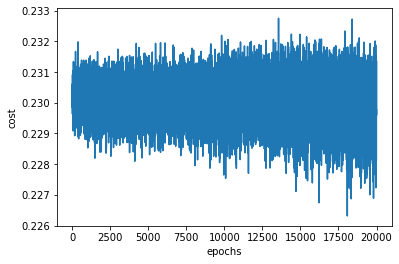

In [50]:
plot_cost()

In [51]:
def plot_accuracy():
    plt.figure()
    plt.plot(np.arange(len(accuracies)), accuracies)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

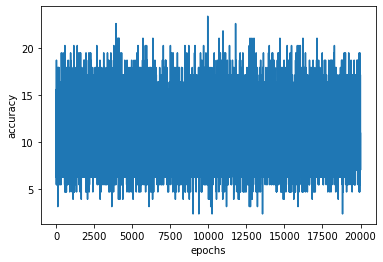

In [52]:
plot_accuracy()

In [54]:
len(costs)

20000

In [55]:
n_costs = costs

In [67]:
cost = 0
avg_costs = []
iterations = []
for i in range(len(n_costs)):
    cost+= n_costs[i]
    if (i+1) % 500 == 0:
        cost /= 500
        avg_costs.append(cost)
        iterations.append((i+1)*10)

In [68]:
def plot_avg_cost():
    plt.figure()
    plt.plot(iterations, avg_costs)
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.show()

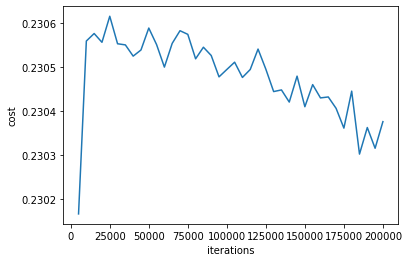

In [69]:
plot_avg_cost()

In [70]:
n_accuracies = accuracies

In [71]:
accuracy = 0
avg_accs = []
iterations = []
for i in range(len(n_accuracies)):
    accuracy+= n_accuracies[i]
    if (i+1) % 500 == 0:
        accuracy /= 500
        avg_accs.append(accuracy)
        iterations.append((i+1)*10)

In [72]:
def plot_avg_accuracy():
    plt.figure()
    plt.plot(iterations, avg_accs)
    plt.xlabel("iterations")
    plt.ylabel("accuracy")
    plt.show()

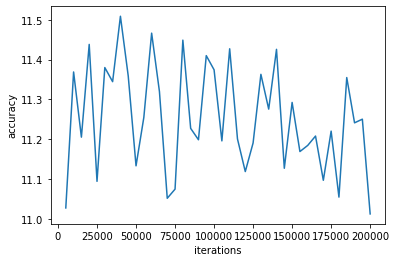

In [73]:
plot_avg_accuracy()